In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set params for plots with pyploy
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [45]:
df = pd.read_csv('eng_data.csv')
df

,Model,Metric,Real set,Validation set,Test set,Clean,Ground,Test - removed bad labels,Rock-A,Rock-B,Average
0,NaN,Dice class 0,0.6788265986,0.967393284,0.9665998527,0.8648424585,0.9665979744,0.9673814225,0.1441615035,0.1126819084,0.1284217059
1,Unet with efficentnetb4,Dice class 1,0.6688873038,0.9355225525,0.9392040677,0.6161176963,0.93919469,0.9421809473,NaN,NaN,NaN
2,Params:,Dice class 2,0.1728180411,0.5921837369,0.6007110024,0.1705115583,0.6007130695,0.6025794023,0.4346747731,0.4734538926,0.4540643329
3,25735452,Dice class 3,0.1916785875,0.5267731445,0.5627286642,0.1920822664,0.5627218154,0.5644103435,NaN,NaN,NaN
4,Inference time:,Dice avg,0.4280526328,0.7554681795,0.7673108967,0.4608884949,0.7673068873,0.7691380289,0.2894181383,0.2930679005,0.2912430194
...,...,...,...,...,...,...,...,...,...,...,...
83,1869764,Dice class 3,0.2728096512,0.4496106321,0.446718556987521,0.4954535687,0.478512209,0.478512209,NaN,NaN,NaN
84,Inference time:,Dice avg,0.4369963311,0.6988513132,0.685672435119065,0.7010197669,0.7039296332,0.7039296332,0.5770130498,0.6436403792,0.6103267145
85,0.02018631999,Mean IoU,0.3826954365,0.6913695931,0.6906458735466,0.6850755811,0.6945094466,0.6945094466,0.4858670533,0.5520564914,0.5189617723
86,NaN,Accuracy,0.8469699025,0.9338744879,0.938519954681397,0.9397342205,0.9342799187,0.9342799187,0.7384415269,0.7776868939,0.7580642104


Text(0.5, 1.0, 'Dice score on test set')

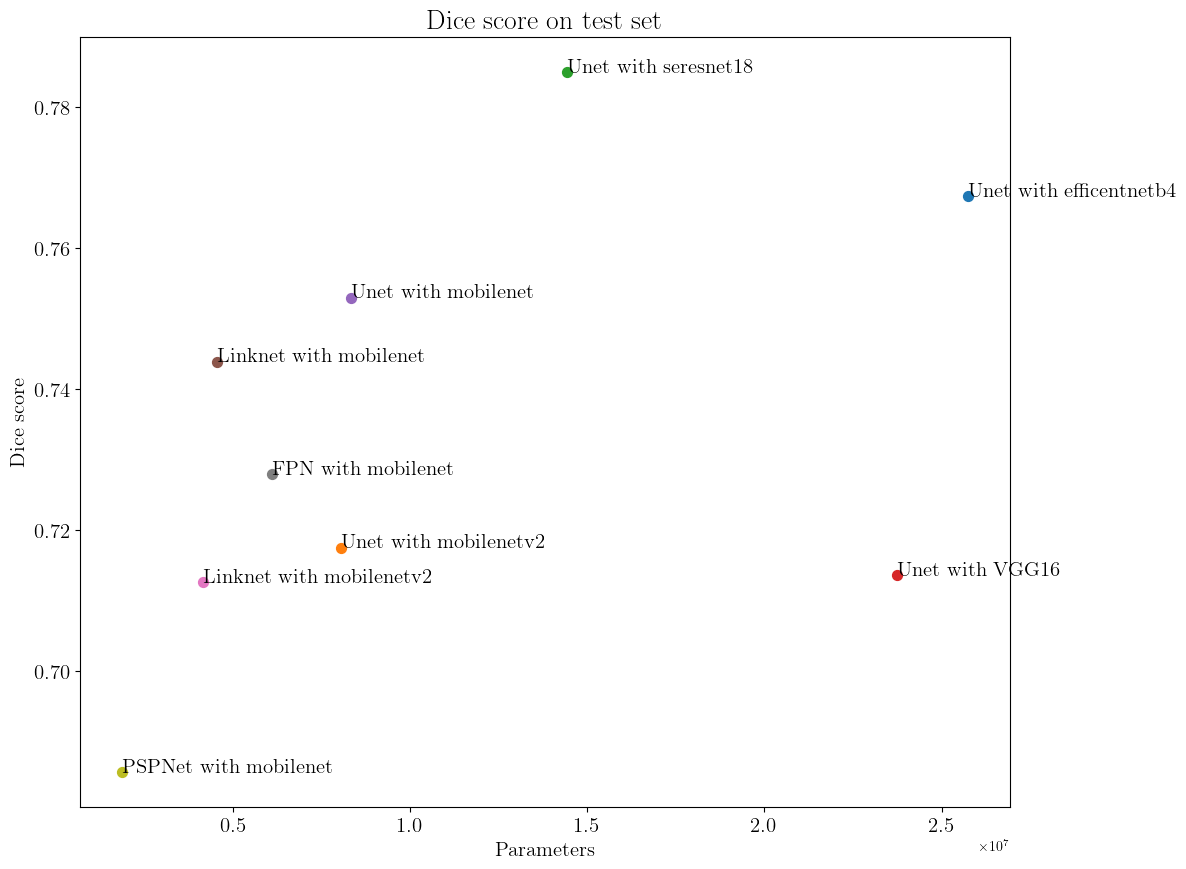

In [43]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot dice loss with respect to model parameters
for i in range(0,90,10):
    ax.scatter(x = int(df['Model'].loc[3 + i]), y = float(df['Test set'].loc[4 + i]), s=50)
    ax.annotate(df['Model'].loc[1 + i], xy =(int(df['Model'].loc[3 + i]), float(df['Test set'].loc[4 + i])), fontsize=15)

ax.set_xlabel('Parameters', size=15)
ax.set_ylabel('Dice score', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Dice score on test set', size=20)

Text(0.5, 1.0, 'Dice score on test set')

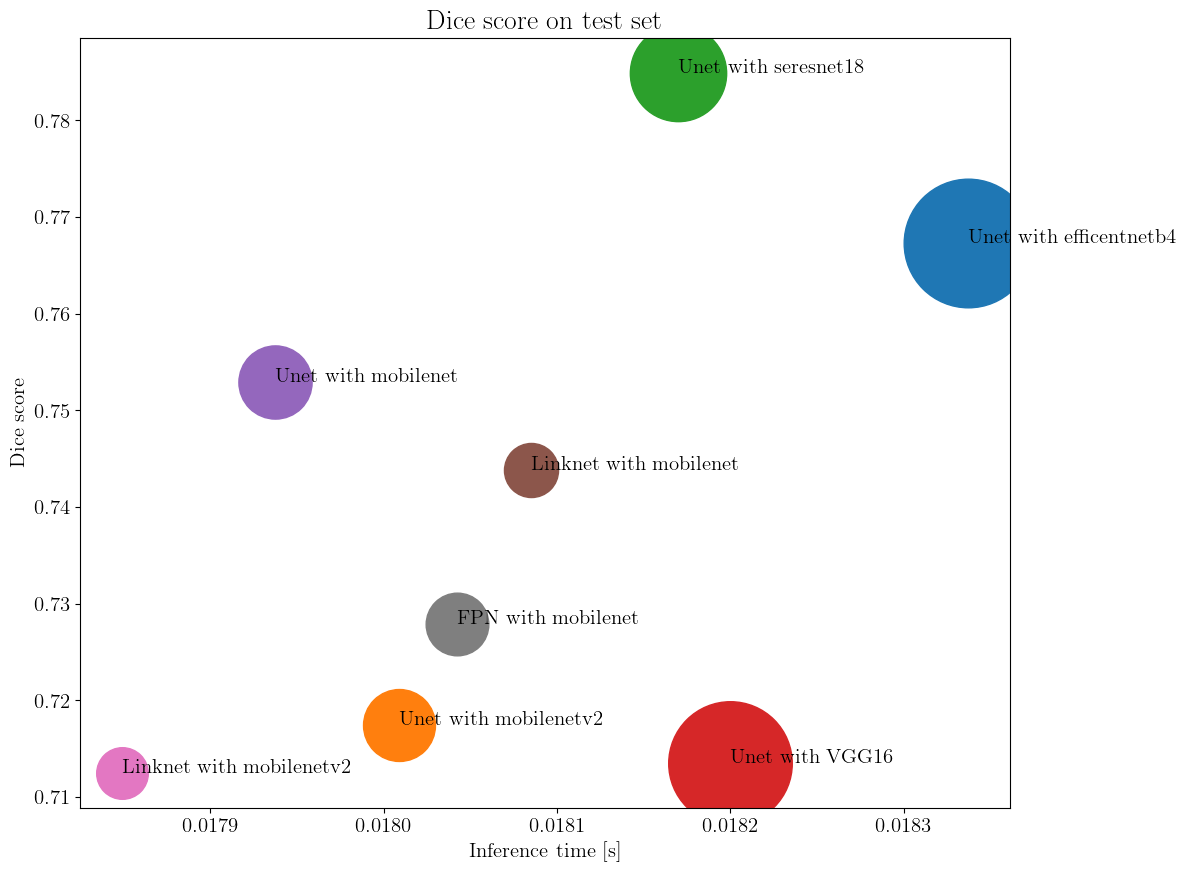

In [64]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot dice loss with respect to model parameters and inference time
for i in range(0,80,10):
    ax.scatter(x = float(df['Model'].loc[5 + i]), y = float(df['Test set'].loc[4 + i]), s=int(df['Model'].loc[3 + i])/3000)
    ax.annotate(df['Model'].loc[1 + i], xy =(float(df['Model'].loc[5 + i]), float(df['Test set'].loc[4 + i])), fontsize=15)

ax.set_xlabel('Inference time [s]', size=15)
ax.set_ylabel('Dice score', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Dice score on test set', size=20)

Text(0.5, 1.0, 'IoU score on test set')

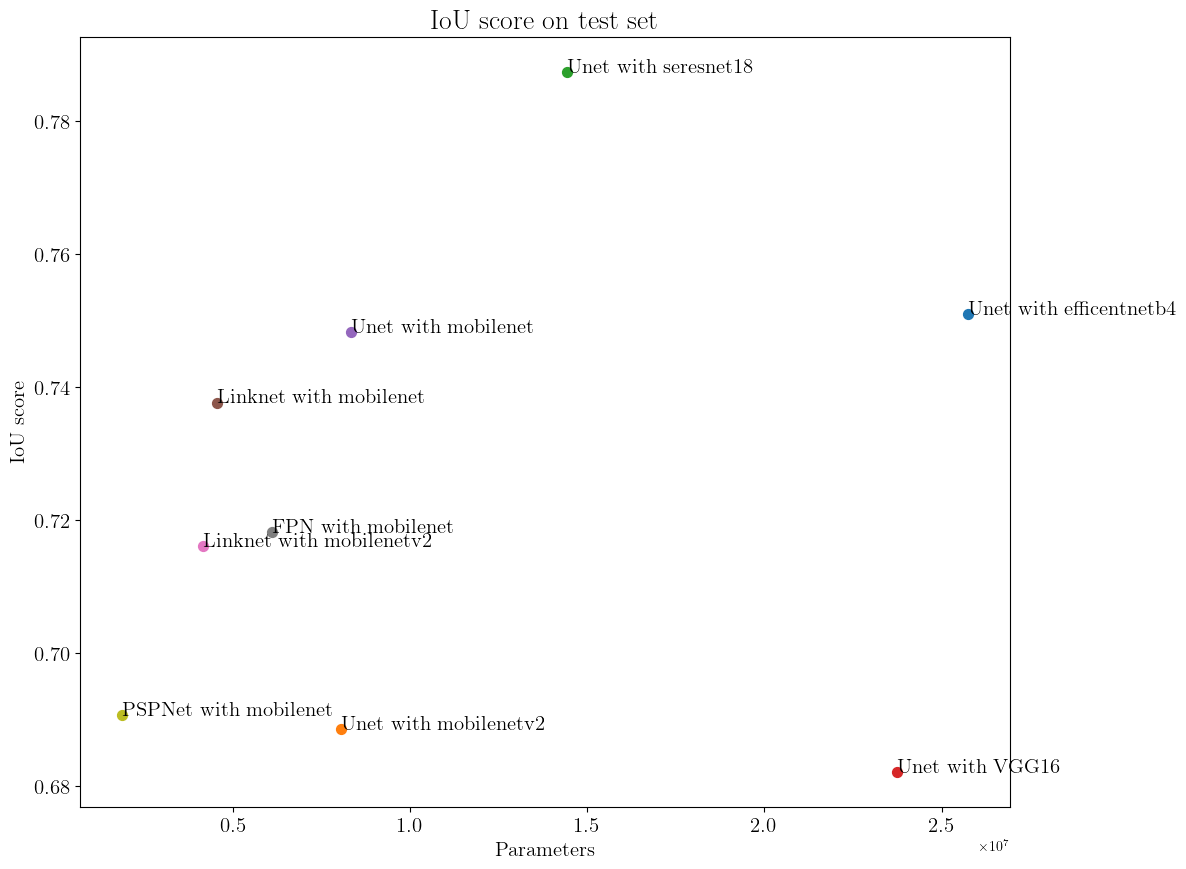

In [42]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot iou score with respect to model parameters 
for i in range(0,90,10):
    ax.scatter(x = int(df['Model'].loc[3 + i]), y = float(df['Test set'].loc[5 + i]), s=50)
    ax.annotate(df['Model'].loc[1 + i], xy =(int(df['Model'].loc[3 + i]), float(df['Test set'].loc[5 + i])), fontsize=15)

ax.set_xlabel('Parameters', size=15)
ax.set_ylabel('IoU score', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('IoU score on test set', size=20)

Text(0.5, 1.0, 'Dice score on test set')

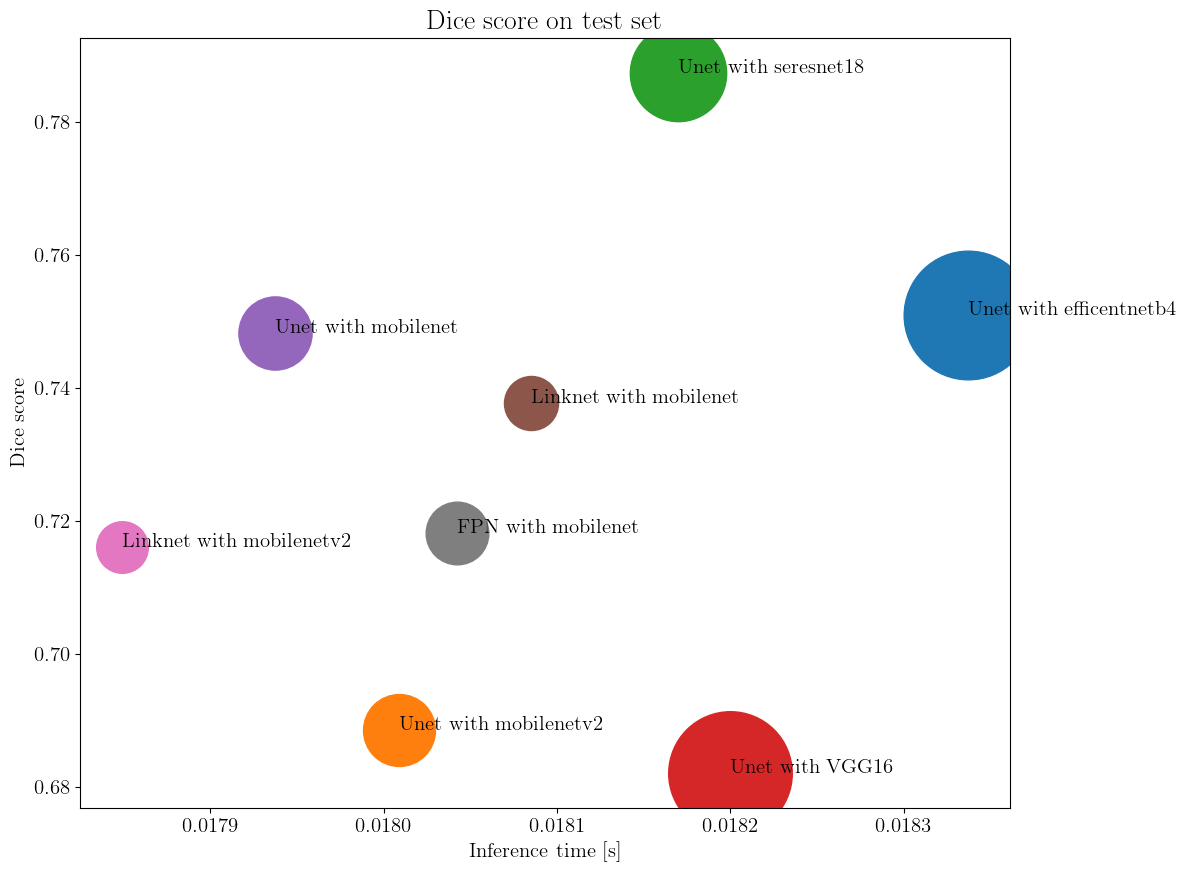

In [65]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot diou with respect to model parameters and inference time
for i in range(0,80,10):
    ax.scatter(x = float(df['Model'].loc[5 + i]), y = float(df['Test set'].loc[5 + i]), s=int(df['Model'].loc[3 + i])/3000)
    ax.annotate(df['Model'].loc[1 + i], xy =(float(df['Model'].loc[5 + i]), float(df['Test set'].loc[5 + i])), fontsize=15)

ax.set_xlabel('Inference time [s]', size=15)
ax.set_ylabel('IoU score', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Dice score on test set', size=20)

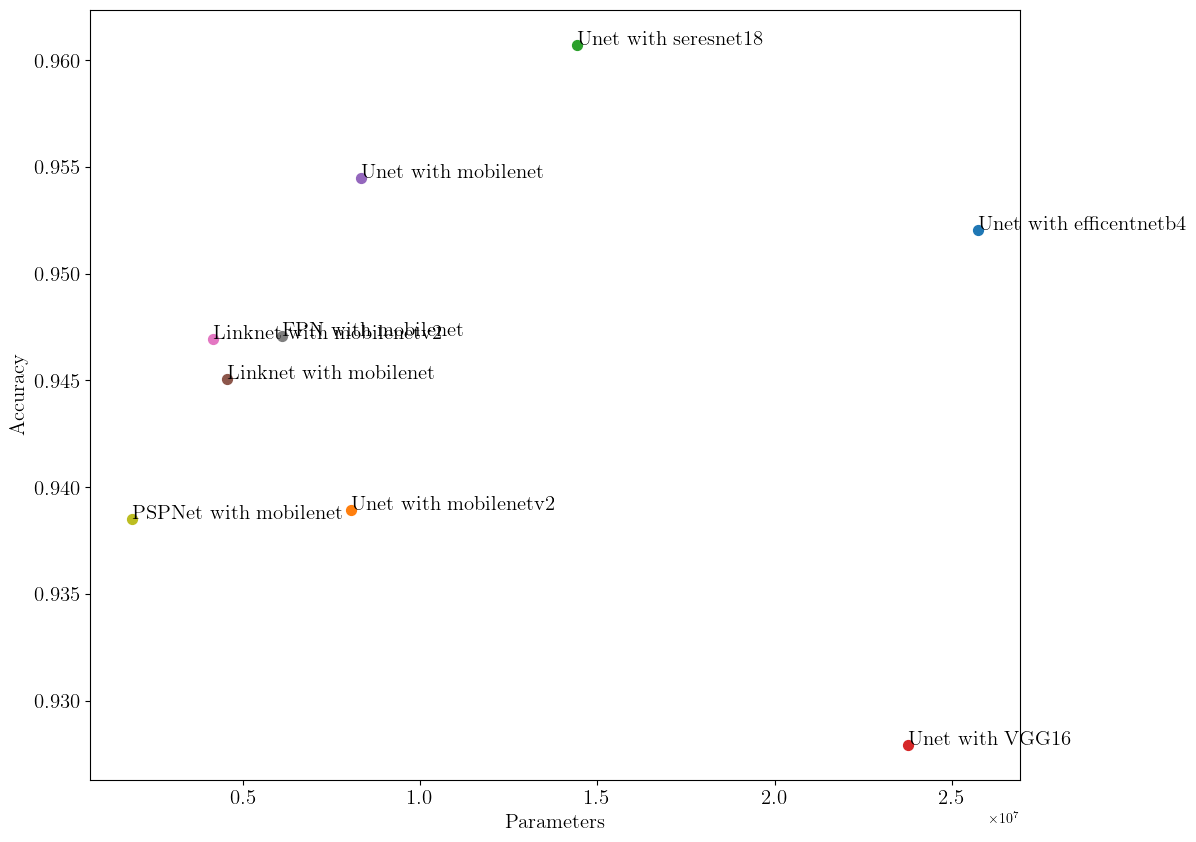

In [37]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot accuracy with respect to model parameters
for i in range(0,90,10):
    ax.scatter(x = int(df['Model'].loc[3 + i]), y = float(df['Test set'].loc[6 + i]), s=50)
    ax.annotate(df['Model'].loc[1 + i], xy =(int(df['Model'].loc[3 + i]), float(df['Test set'].loc[6 + i])), fontsize=15)

ax.set_xlabel('Parameters', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Accuracy score on test set', size=20)

Text(0.5, 1.0, 'Dice score on test set')

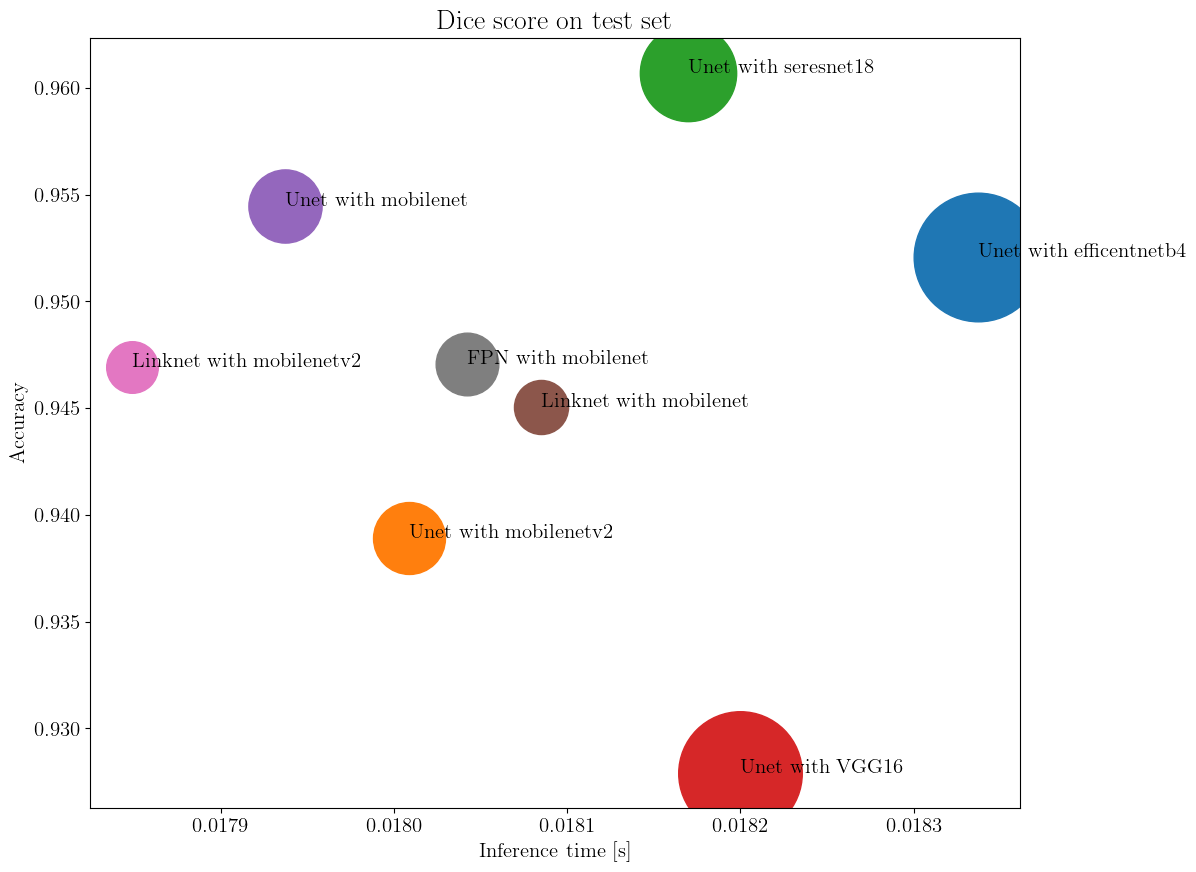

In [66]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot accuracywith respect to model parameters and inference time
for i in range(0,80,10):
    ax.scatter(x = float(df['Model'].loc[5 + i]), y = float(df['Test set'].loc[6 + i]), s=int(df['Model'].loc[3 + i])/3000)
    ax.annotate(df['Model'].loc[1 + i], xy =(float(df['Model'].loc[5 + i]), float(df['Test set'].loc[6 + i])), fontsize=15)

ax.set_xlabel('Inference time [s]', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Dice score on test set', size=20)

Text(0.5, 1.0, 'Dice score on mars set')

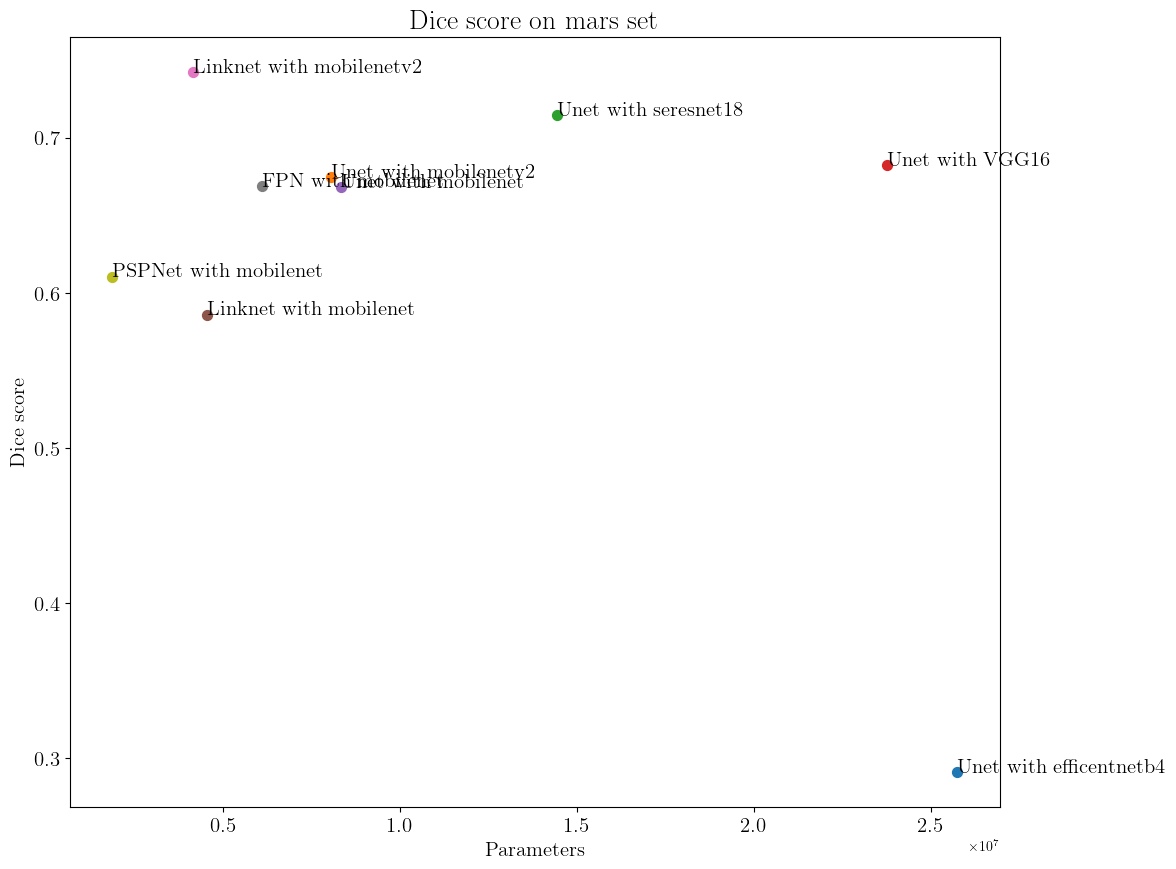

In [67]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot dice loss with respect to model parameters
for i in range(0,90,10):
    ax.scatter(x = int(df['Model'].loc[3 + i]), y = float(df['Average'].loc[4 + i]), s=50)
    ax.annotate(df['Model'].loc[1 + i], xy =(int(df['Model'].loc[3 + i]), float(df['Average'].loc[4 + i])), fontsize=15)

ax.set_xlabel('Parameters', size=15)
ax.set_ylabel('Dice score', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Dice score on mars set', size=20)

Text(0.5, 1.0, 'IoU score on mars set')

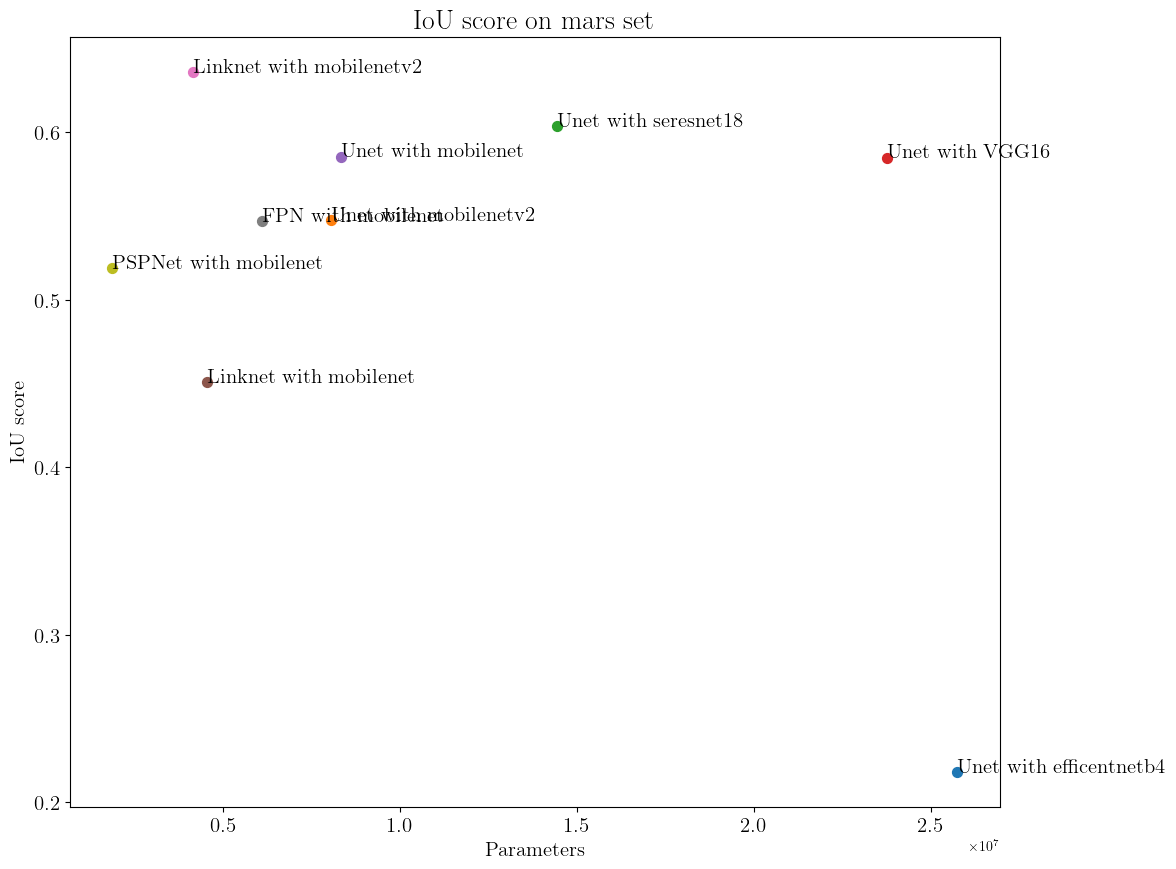

In [68]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot dice loss with respect to model parameters
for i in range(0,90,10):
    ax.scatter(x = int(df['Model'].loc[3 + i]), y = float(df['Average'].loc[5 + i]), s=50)
    ax.annotate(df['Model'].loc[1 + i], xy =(int(df['Model'].loc[3 + i]), float(df['Average'].loc[5 + i])), fontsize=15)

ax.set_xlabel('Parameters', size=15)
ax.set_ylabel('IoU score', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('IoU score on mars set', size=20)

Text(0.5, 1.0, 'Accuracy on mars set')

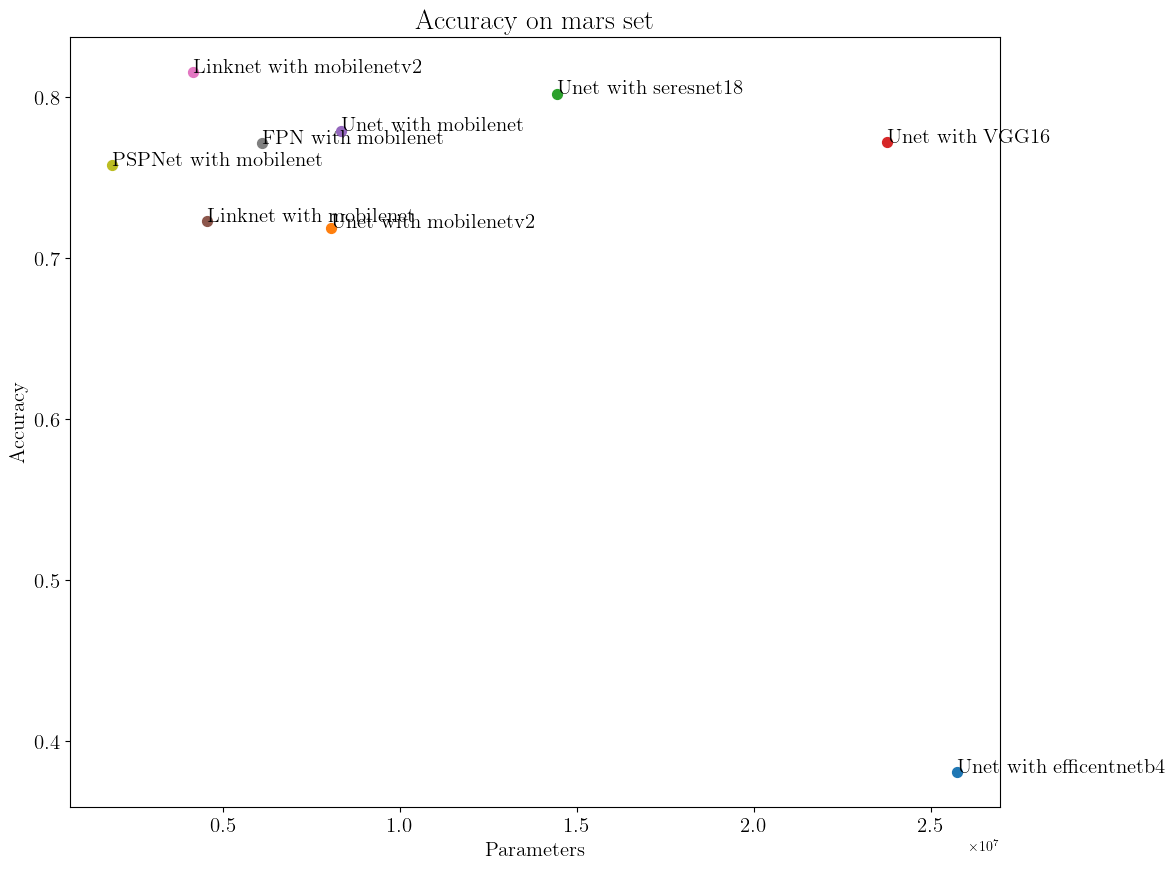

In [69]:
fig, ax = plt.subplots(figsize=(12,10))

# Plot dice loss with respect to model parameters
for i in range(0,90,10):
    ax.scatter(x = int(df['Model'].loc[3 + i]), y = float(df['Average'].loc[6 + i]), s=50)
    ax.annotate(df['Model'].loc[1 + i], xy =(int(df['Model'].loc[3 + i]), float(df['Average'].loc[6 + i])), fontsize=15)

ax.set_xlabel('Parameters', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Accuracy on mars set', size=20)